# Classification of User Knowledge Based on the Degree of Study Time for Goal Object Materials and the Degree of Repetition Number of User for Goal Object Materials


## Introdunction
In this project, we will be using the user knowledge database which was developed in 2013. The dataset shows the student's knowledge about the subject, electrical DC machines. The dataset is multivariant and has 403 observations. We will use this data to make predictions of a student's knowledge based on two predator variables. 
The questions we want to answer is: 

* **What are the student's knowledge levels based on STG (the degree of study time for goal object materials) and SCG (the degree of repetition number of user for goal object materials)?**


## Methods



* We will be using **STG** and **SCG** columns as our predictors and the **UNS** columns as our response 
    * The reason why we only chose **STG** **SCG** as our predictors is because other other variables (...) does not quite correlate to the categorical variable, **UNS**. 
* We will be using the *K-nearest neighbor classification* algorithm
* Since the data is split already into a training set and a test set, we do not have to split it again
* The first step is to choose the most suitable parameter K by splitting the training data into multiple different train/validation splits through cross-validation.
* We will be using 5-fold cross-validation to create 5 different validation sets.

## Premliminary Exploartory Data Analysis

In [9]:
library(tidyverse)
library(readxl)
library(tidymodels)
options(repr.plot.width = 20, repr.plot.height =10) 

In [10]:
data_training = read_excel("data/user_knowledge.xls", sheet = "Training_Data", range = "A1:F259")
head(data)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


In [11]:
data_wrangled <- data_training |>
select(STG, SCG, UNS) |>
rename(study_time = STG, repetition = SCG, knowledge_level = UNS)

head(data_wrangled)

study_time,repetition,knowledge_level
<dbl>,<dbl>,<chr>
0.00,0.00,very_low
0.08,0.08,High
0.06,0.06,Low
0.10,0.10,Middle
0.08,0.08,Low
0.09,0.15,Middle


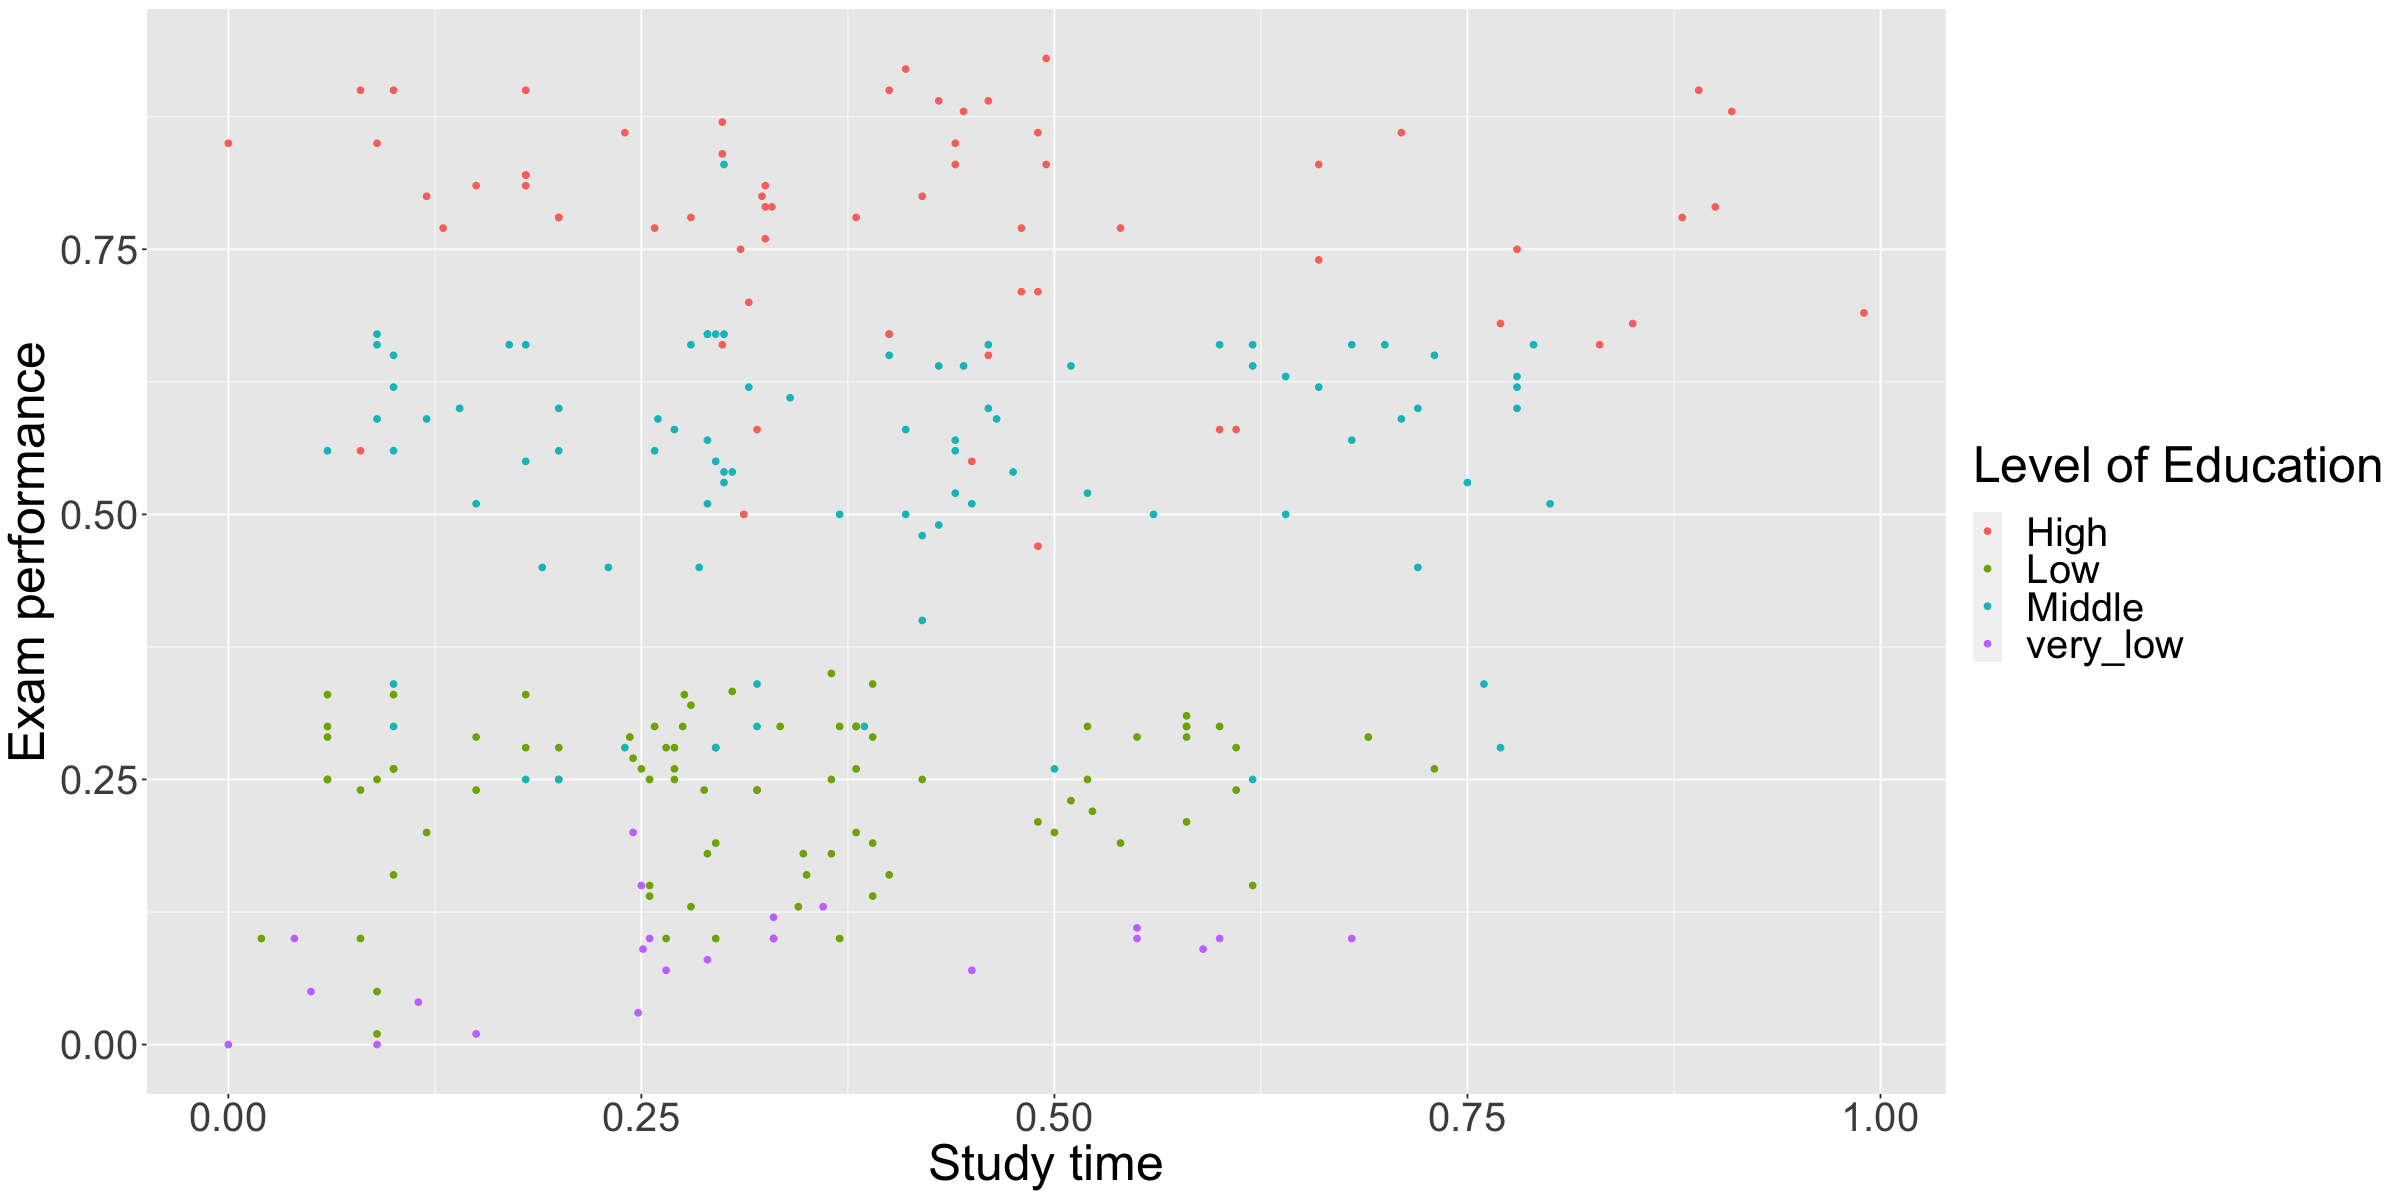

In [21]:
stg_vs_peg_plot <- data_training |>
ggplot(aes(x = STG, y = PEG, color = UNS)) +
geom_point() +
labs(x = "Study time", y = "Exam performance", color = "Level of Education") +
theme(text = element_text(size = 30))

stg_vs_peg_plot